# Data Science: Logistic Regression 
#### By: Javier Orduz
<!--
<img
src="https://jaorduz.github.io/images/Javier%20Orduz_01.jpg" width="50" align="center">
-->

[license-badge]: https://img.shields.io/badge/License-CC-orange
[license]: https://creativecommons.org/licenses/by-nc-sa/3.0/deed.en

[![CC License][license-badge]][license]  [![DS](https://img.shields.io/badge/downloads-DS-green)](https://github.com/Earlham-College/DS_Fall_2022)  [![Github](https://img.shields.io/badge/jaorduz-repos-blue)](https://github.com/jaorduz/)  ![Follow @jaorduc](https://img.shields.io/twitter/follow/jaorduc?label=follow&logo=twitter&logoColor=lkj&style=plastic)


We load the different packages that we will use.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


%matplotlib inline

To build the model using ```LogReg```

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

Evaluation and metrics

In [3]:
from sklearn.metrics import jaccard_score

<h1>Table of contents</h1>

<div class="alert  alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#logReg">Logistic Regression</a></li>
<!---         <ol>
             <li><a href="#reData">Reading</a></li>
             <li><a href="#exData">Exploration</a></li>
         </ol>
         --->
        <li><a href="#unData">Data</a></li>
    </ol>
</div>
<br>
<hr>

<h2 id="reData">Logistic Regression</h2>

Previously, we normalize our data, what does it mean? We are going to create the datasets.
Before revising the next cells, you should check our previous notebook.

In [4]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.shape

(200, 28)

In [5]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asarray(churn_df['churn'])

In [6]:
X = preprocessing.StandardScaler().fit(X).transform(X)

# Training the model

## Split the data set

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [8]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


# Model

```LogisticRegression``` is a class with ```liblinear``` solver. ```C``` is a __float__ value. It is the inverse of regularization strength; must be a positive float. Like in SVM, smaller values specify stronger regularization.

In [9]:

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# Predictions

We use test set.

In [10]:
yhat = LR.predict(X_test)

And we obtain the probability of class 0, $P(Y=0\mid X),$ and probability of class 1,
$P(Y=1\mid X)$

In [11]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

## Evaluation

### jaccard index

Let's try the jaccard index for accuracy evaluation. 

$$
J(A, B) = \frac{\mid A \cap B\mid}{\mid A \cup B \mid} 
$$

we can define jaccard as ```the size of the intersection divided by the size of the union of the two label sets.``` 

<img
src="https://miro.medium.com/max/634/1*PuS5uLb2QgeXuglW7XfETA.png" width="350" align="center">


If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


In [12]:
jaccard_score(y_test, yhat,pos_label=0)

0.7058823529411765

## Confusion Matrix

Another way of looking at the accuracy of the classifier is to look at **confusion matrix**.


In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


### Compute confusion matrix


In [14]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

### Plot non-normalized confusion matrix


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


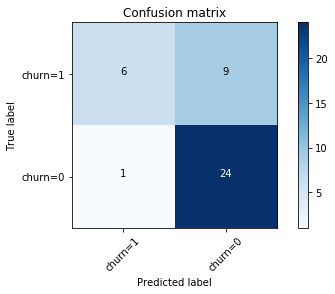

In [15]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],
    normalize= False,  title='Confusion matrix')

1. Let's look at first row. It is for customers whose actual churn value in the test set is 1.
    - As you can calculate, out of 40 customers, the churn value of 15 of them is 1.
Out of these 15 cases, the classifier correctly predicted 6 of them as 1, and 9 of them as 0.
This means, 
    - for 6 customers, the actual churn value was 1 in test set and classifier also correctly predicted those as 1. 
    - However, while the actual label of 9 customers was 1, the classifier predicted those as 0, which is not very good. We can consider it as the error of the model for first row.
What about the customers with churn value 0? 
2. Lets look at the second row. It looks like  there were 25 customers whom their churn value were 0.
    - The classifier correctly predicted 24 of them as 0, 
    - and one of them wrongly as 1. 
So, it has done a good job in predicting the customers with churn value 0. 
    
A good thing about the confusion matrix is that it shows the model’s ability to correctly predict or separate the classes.  In a specific case of the binary classifier, such as this example,  we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives.


In [16]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.73      0.96      0.83        25
         1.0       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



Based on the count of each section, we can calculate precision and recall of each label:

*   **Precision** is a measure of the accuracy provided that a class label has been predicted. It is defined by: 
$$\text{precision} = \frac{TP}{TP + FP}$$

*   **Recall** is the true positive rate. It is defined as: 
$$\text{recall} =  \frac{TP}{TP + FN}$$

So, we can calculate the precision and recall of each class.

**F1 score:**
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

Finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.


## log loss

Now, let's try **log loss** for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.


In [17]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101185

# Exercises
1. Build a Logistic regression model for the same dataset, but use a different solver 1. Explain the regularization techniques and how it is implemented in this logistic regression notebook.
1. Explain the Jaccard index, confussion matrix, and f1-score.
1. Submmit your report in Moodle. Template https://www.overleaf.com/read/xqcnnnrsspcp


In [18]:
LR = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

## Versions

In [41]:
from platform import python_version
print("python version: ", python_version())
!pip3 freeze | grep qiskit

python version:  3.8.9


# References

[0] data https://tinyurl.com/2m3vr2xp

[1] numpy https://numpy.org/

[2] scipy https://docs.scipy.org/

[3] matplotlib https://matplotlib.org/

[4] matplotlib.cm https://matplotlib.org/stable/api/cm_api.html

[5] matplotlib.pyplot https://matplotlib.org/stable/api/pyplot_summary.html

[6] pandas https://pandas.pydata.org/docs/

[7] seaborn https://seaborn.pydata.org/

[8] Jaccard https://tinyurl.com/27bboh2u

[9] IBM course. Author: Saeed Aghabzorgi. IBM lab skills. Watson Studio.

